In [ ]:
# ============================================================
# 1. Imports y configuración
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)

# Fijar semillas para algo de reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# ============================================================
# 2. Carga de datos procesados (.npy)
# ============================================================

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

print("Dimensiones de los datos:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

n_features = X_train.shape[1]
print("\nNúmero de features de entrada:", n_features)

# Ver distribución de clases en train y test
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("\nDistribución de clases en y_train:")
for u, c in zip(unique_train, counts_train):
    print(f"Clase {u}: {c} ({c / len(y_train):.3f})")

print("\nDistribución de clases en y_test:")
for u, c in zip(unique_test, counts_test):
    print(f"Clase {u}: {c} ({c / len(y_test):.3f})")

Dimensiones de los datos:
X_train: (39073, 108)
X_test : (9769, 108)
y_train: (39073,)
y_test : (9769,)

Número de features de entrada: 108

Distribución de clases en y_train:
Clase 0: 29724 (0.761)
Clase 1: 9349 (0.239)

Distribución de clases en y_test:
Clase 0: 7431 (0.761)
Clase 1: 2338 (0.239)


In [ ]:
# ============================================================
# 3. Definición del modelo: red neuronal 1 capa oculta
# ============================================================

model = Sequential([
    Dense(n_features, activation="sigmoid", input_shape=(n_features,)),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 108)            │        11,772 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           109 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,881 (46.41 KB)

 Trainable params: 11,881 (46.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ============================================================
# 4. Entrenamiento del modelo
# ============================================================

# Early stopping para evitar sobreajuste absurdo
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8050 - loss: 0.4131 - val_accuracy: 0.8486 - val_loss: 0.3248
Epoch 2/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8461 - loss: 0.3278 - val_accuracy: 0.8507 - val_loss: 0.3204
Epoch 3/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8471 - loss: 0.3233 - val_accuracy: 0.8499 - val_loss: 0.3200
Epoch 4/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3220 - val_accuracy: 0.8503 - val_loss: 0.3199
Epoch 5/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3213 - val_accuracy: 0.8509 - val_loss: 0.3197
Epoch 6/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8478 - loss: 0.3206 - val_accuracy: 0.8512 - val_loss: 0.3193
Epoch 7/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3199 - val_accuracy: 0.8511 - val_loss: 0.3189
Epoch 8/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8494 - loss: 0.3191 - val_accu

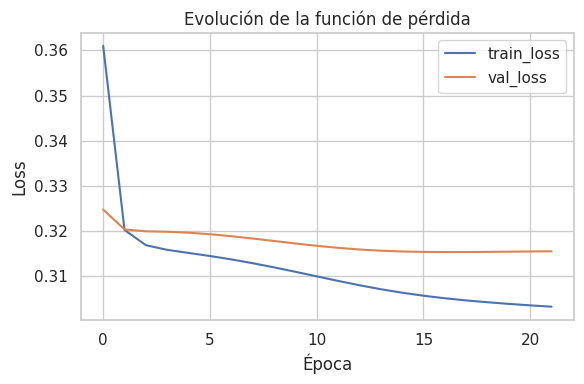

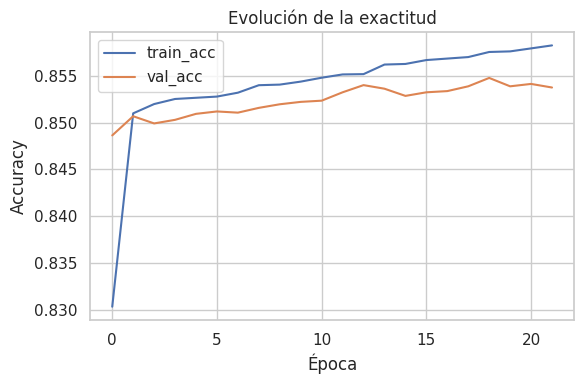

In [ ]:
# ============================================================
# 5. Curvas de entrenamiento (loss y accuracy)
# ============================================================

# Loss
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolución de la función de pérdida")
plt.legend()
plt.tight_layout()
plt.show()

# Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Evolución de la exactitud")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# 6. Evaluación en conjunto de prueba
# ============================================================

y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\nMétricas en conjunto de prueba (Red 1 capa oculta):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nReporte de clasificación completo:")
print(classification_report(y_test, y_pred, digits=4))


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Métricas en conjunto de prueba (Red 1 capa oculta):
Accuracy : 0.8577
Precisión: 0.7423
Sensibilidad (Recall): 0.6210
F1-score: 0.6763

Reporte de clasificación completo:
              precision    recall  f1-score   support

           0     0.8866    0.9322    0.9088      7431
           1     0.7423    0.6210    0.6763      2338

    accuracy                         0.8577      9769
   macro avg     0.8145    0.7766    0.7926      9769
weighted avg     0.8521    0.8577    0.8532      9769



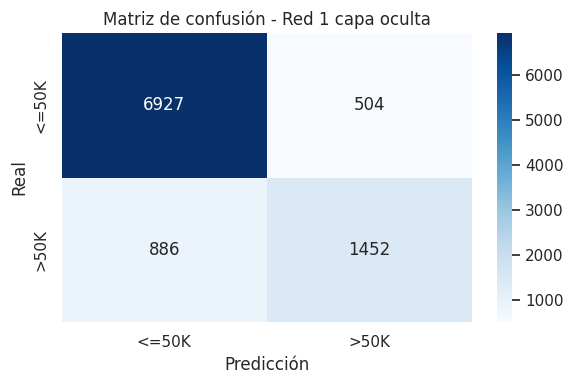


Matriz de confusión (forma numérica):
[[6927  504]
 [ 886 1452]]


In [ ]:
# ============================================================
# 7. Matriz de confusión
# ============================================================

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["<=50K", ">50K"],
    yticklabels=["<=50K", ">50K"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Red 1 capa oculta")
plt.tight_layout()
plt.show()

print("\nMatriz de confusión (forma numérica):")
print(cm)
